In [108]:
%matplotlib inline
import csv
import math
import numpy as np
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'axes.titlesize': 'large'})
plt.rcParams.update({'axes.labelsize': 'large'})

def smart_convert(string):
    if " Hz" in string:
        return float(string.replace(" Hz", "e0"))
    elif " kHz" in string:
        return float(string.replace(" kHz", "e3"))
    elif " MHz" in string:
        return float(string.replace(" MHz", "e6"))
    elif " GHz" in string:
        return float(string.replace(" GHz", "e9"))
    elif "j" in string:
        return complex(string.replace(" ", "").replace("j", "") + "j")
    else:
        print('warning! smart_convert')
        return None
    
def complex_to_db(cmpx_number):
    if isinstance(cmpx_number, list) or isinstance(cmpx_number, np.ndarray):
        return [20.0 * math.log(math.sqrt(x.real**2 + x.imag**2), 10) for x in cmpx_number]
    else:
        return 20.0 * math.log(math.sqrt(cmpx_number.real**2 + cmpx_number.imag**2), 10)

def read_csv(filename, row_offset=3):
    data = []
    with open(filename, 'r') as f:
        reader = csv.reader(f)
        for i in range(0, row_offset):
            next(reader)
        for row in reader:
            row = [smart_convert(d) for d in row]
            data += [row]
    return data

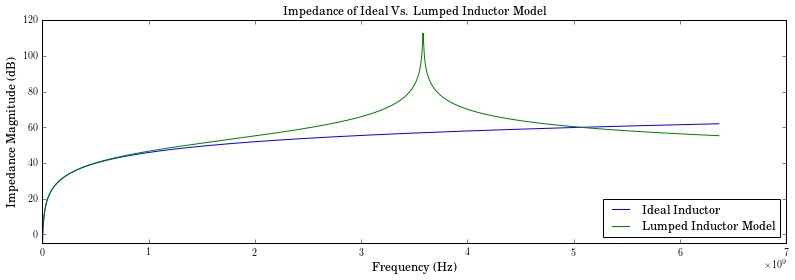

In [98]:
# format: freq, ideal inductor current, nonideal inductor current
inductor_data = read_csv('data/inductor_data.csv')
ideal_ind_impedance = [1.0/x[1] for x in inductor_data]
nonideal_ind_impedance = [1.0/x[2] for x in inductor_data]
freq_new = [x[0]/(2*math.pi) for x in inductor_data]
freq_orig = [x[0] for x in inductor_data]

width, height = plt.figaspect(0.3)
fig = plt.figure(figsize=(width,height))
plt.plot(freq_new, complex_to_db(ideal_ind_impedance))
plt.plot(freq_new, complex_to_db(nonideal_ind_impedance))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Impedance Magnitude (dB)')
plt.ylim([-5, 120])
plt.title('Impedance of Ideal Vs. Lumped Inductor Model')
plt.legend(['Ideal Inductor', 'Lumped Inductor Model'], loc='lower right')
plt.savefig('images/inductor_impedance.png', bbox_inches='tight', dpi=300)
plt.show()

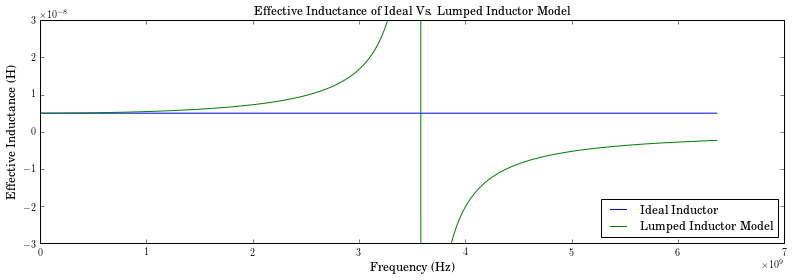

In [99]:
width, height = plt.figaspect(0.3)
fig = plt.figure(figsize=(width,height))
ideal_ind_inductance = [""] * len(ideal_ind_impedance)
nonideal_ind_inductance = [""] * len(nonideal_ind_impedance)
for i in range(0, len(ideal_ind_impedance)):
    ideal_ind_inductance[i] = ideal_ind_impedance[i].imag / (freq_orig[i]) / (2 * math.pi)
    nonideal_ind_inductance[i] = nonideal_ind_impedance[i].imag / (freq_orig[i]) / (2 * math.pi)

plt.plot(freq_new, ideal_ind_inductance)
plt.plot(freq_new, nonideal_ind_inductance)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Effective Inductance (H)')
plt.ylim([-30e-9, 30e-9])
plt.title('Effective Inductance of Ideal Vs. Lumped Inductor Model')
plt.legend(['Ideal Inductor', 'Lumped Inductor Model'], loc='lower right')
plt.savefig('images/inductor_inductance.png', bbox_inches='tight', dpi=300)
plt.show()

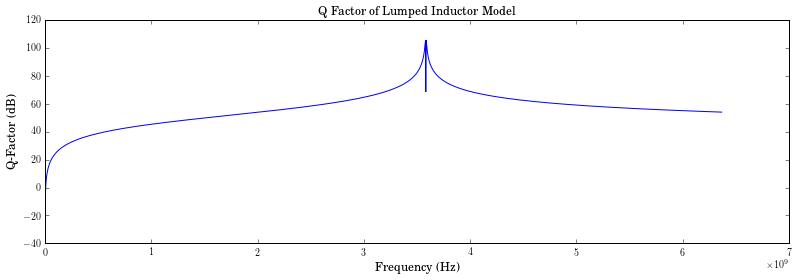

In [111]:
width, height = plt.figaspect(0.3)
fig = plt.figure(figsize=(width,height))
plt.plot(freq_new, complex_to_db(np.abs([x.imag for x in nonideal_ind_impedance]) / 1.15))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Q-Factor (dB)')
plt.title('Q Factor of Lumped Inductor Model')
plt.savefig('images/inductor_q.png', bbox_inches='tight', dpi=300)
plt.show()

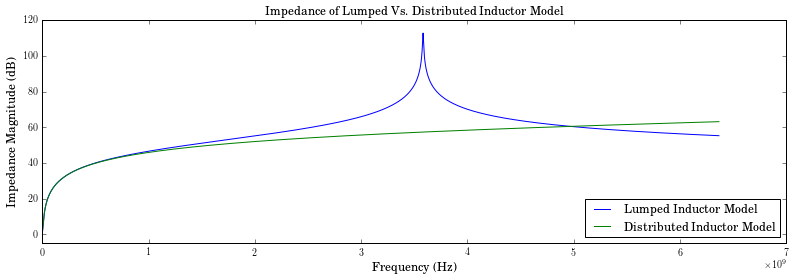

In [114]:
inductor_distr_data = read_csv('data/inductor_distr_data.csv')
distr_ind_impedance = [1.0/x[1] for x in inductor_distr_data]

width, height = plt.figaspect(0.3)
fig = plt.figure(figsize=(width,height))
plt.plot(freq_new, complex_to_db(nonideal_ind_impedance))
plt.plot(freq_new, complex_to_db(distr_ind_impedance))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Impedance Magnitude (dB)')
plt.ylim([-5, 120])
plt.title('Impedance of Lumped Vs. Distributed Inductor Model')
plt.legend(['Lumped Inductor Model', 'Distributed Inductor Model'], loc='lower right')
plt.savefig('images/inductor_distr_impedance.png', bbox_inches='tight', dpi=300)
plt.show()

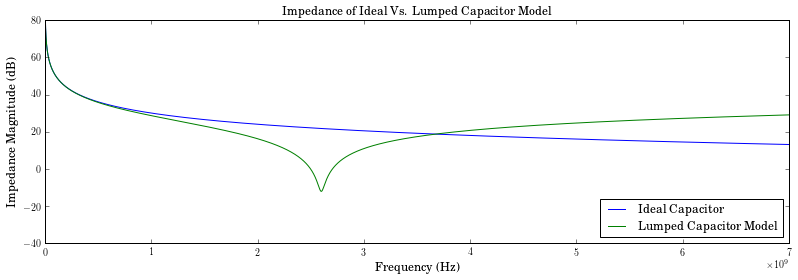

In [117]:
# format: freq, nonideal inductor current, ideal inductor current
capacitor_data = read_csv('data/capacitor_data.csv')
ideal_cap_impedance = [1.0/x[2] for x in capacitor_data]
nonideal_cap_impedance = [1.0/x[1] for x in capacitor_data]
cap_freq = [x[0] for x in capacitor_data]

width, height = plt.figaspect(0.3)
fig = plt.figure(figsize=(width,height))
plt.plot(cap_freq, complex_to_db(ideal_cap_impedance))
plt.plot(cap_freq, complex_to_db(nonideal_cap_impedance))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Impedance Magnitude (dB)')
plt.ylim([-40, 80])
plt.title('Impedance of Ideal Vs. Lumped Capacitor Model')
plt.legend(['Ideal Capacitor', 'Lumped Capacitor Model'], loc='lower right')
plt.savefig('images/cap_impedance.png', bbox_inches='tight', dpi=300)
plt.show()

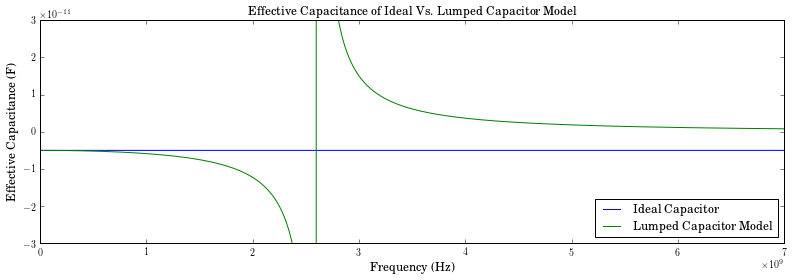

In [124]:
ideal_cap_inductance = [""] * len(ideal_cap_impedance)
nonideal_cap_inductance = [""] * len(nonideal_cap_impedance)
for i in range(0, len(ideal_cap_impedance)):
    ideal_cap_inductance[i] = 1 / (ideal_cap_impedance[i].imag * cap_freq[i] * 2 * math.pi)
    nonideal_cap_inductance[i] = 1 / (nonideal_cap_impedance[i].imag * cap_freq[i] * 2 * math.pi)

width, height = plt.figaspect(0.3)
fig = plt.figure(figsize=(width,height))

plt.plot(cap_freq, ideal_cap_inductance)
plt.plot(cap_freq, nonideal_cap_inductance)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Effective Capacitance (F)')
plt.ylim([-30e-12, 30e-12])
#plt.ylim([-7e-12, -5e-12])
#plt.xlim([0, 1e9])
plt.title('Effective Capacitance of Ideal Vs. Lumped Capacitor Model')
plt.legend(['Ideal Capacitor', 'Lumped Capacitor Model'], loc='lower right')
plt.savefig('images/cap_capacitance.png', bbox_inches='tight', dpi=300)
plt.show()

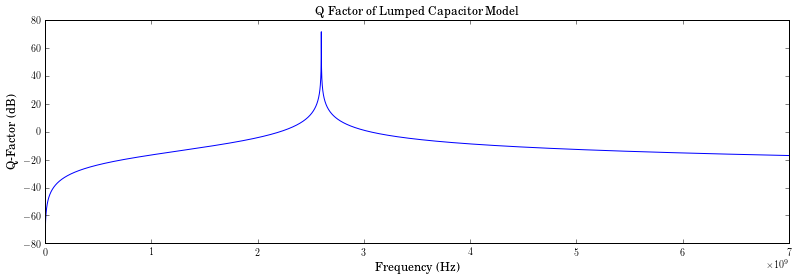

In [128]:
width, height = plt.figaspect(0.3)
fig = plt.figure(figsize=(width,height))
plt.plot(cap_freq, complex_to_db(1 / np.abs([x.imag for x in nonideal_cap_impedance]) / 0.25))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Q-Factor (dB)')
plt.title('Q Factor of Lumped Capacitor Model')
plt.savefig('images/capacitor_q.png', bbox_inches='tight', dpi=300)
plt.show()